# Music and Machine Learning

Welcome! This is the guided walthrough for the jtTalks workshop "Music and Machine Learning."

In this session, we will see how to create a machine learning model that classifies a snippet of music into one of 9 genres, namely

                blues, classical, country, disco, hip-hop, jazz, metal, pop, reggae, rock.

To do this, we will first need to understand how to represent music quantitatively using data, and then how to extract features which are predictive of genre.

### A Super-Short Intro to Coding

This document is a *Jupyter notebook*, which is an environment running on a remote server that knows how to execute commands in the Python programming language.

Each of these boxes is called a __cell__. A cell that contains Python code can be *evaluated* by clicking on it and hitting the Shift and Enter keys at the same time.

As an example, click on the cell following this one and hit Shift + Enter. This will load a bunch of "helper code" I've written to setup the rest of the workshop.

In [28]:
## Click inside this cell and hit Shift + Enter

%run setup.py
%matplotlib inline
## This runs my helper code

print "The setup is complete. Now our story begins."

The setup is complete. Now our story begins.


## First Course: Music as Data

How do you take a piece of sound and represent it in a way that a computer can understand?

Sound is just a series of pressure changes in the air. Do you have an obnoxious "DJ" friend who insists on turning up the bass until you feel your intestines vibrating? That alternating "push, then pull" phenomenon is the oscillating air pressure.

We can represent this with a series of numbers, where a positive number indicates a "push" and a negative number indicates a "pull."

The following cells shows you how to get a list of numbers for some sound and look at them.

In [3]:
## I've sneakily written a function for you called "get_note"

my_note = get_note()
listen(my_note)

In [6]:
## Let's look at the numbers hiding behind this sound

print my_note

[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   7.62939453e-05
   6.10351562e-05   4.57763672e-05]


Notice the "..." above. That list of numbers is very long! There are over __44,0000__ numbers per second of audio! Let's listen to some other samples

In [28]:
my_chord = get_chord()
my_scale = get_scale()

listen(my_chord)

__Your turn__. Change the above to listen to the chromatic scale, which I've called *my_scale*.

[*Amusing side note*: a former student once told me that I'm a very possessive person, since I always use the word "my" when naming variables, like "my_chord", "my_scale", and so on. I reminded him that he was sitting in __my__ office.]

One tool we'll use to understand a snippet of audio is a __spectrogram__.

This is a colorful plot. The *y* axis represents different frequencies, where higher *y* means higher pitch. The *x* axis is increasing time. A redder color means that there is __less__ volume in the sound at that frequency, and a bluer color means there's __less__ volume.

I have, again, sneakily written a function called *spectrogram* which makes this plot for you automatically.

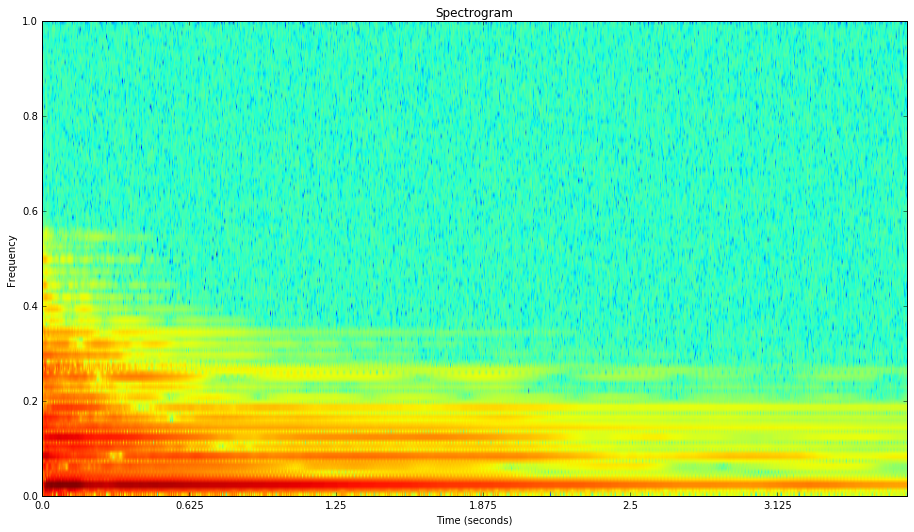

In [33]:
spectrogram(my_note)

__Your turn__. Change the cell above to look at the spectrogram for the chord and the scale. How are they different?

__Challenge__. Enough with the silly notes and chords. Now let's listen to a real song.

Your job:
* Get the array for part of a song using the get_sample() function.
* Print out the array to look at the numbers storing the audio data.
* Plot the numbers representing the pressure over time using the plot() function (I haven't showed you how to do this!)
* Listen to the audio. Do you know this song?
* Look at the spectrogram. This is much harder to read than before! Can you identify three different regions?

In [ ]:
song_sample = get_sample()
## Your code goes here!

#### Feature Engineering

Now let's get down to brass tacks.

I've collected __1,000__ samples of music, collected into 10 different genres. We want to teach a computer to tell which genre is which.

First, let's get a sense for what the different samples sound like.

In [32]:
my_sample = get_song("jazz", 52)
listen(my_sample)

__Your turn__. Change the genre and number above a few times and listen to a couple samples.

What about classical #47? Blues #3? Hip-hop #94? Country #27? Try a few!

We need to think of some features which help us tell one type of music apart from another.

__Brainstorm__. Think of as many features of music as you can. These can be very simple things that have words for them (the pitch of the sound, or the tempo / beats per minute, etc.) or something very complicated which you can only describe approximately (how many different pitches, i.e. different instruments, are there in a sample? what fraction of the audio is human speech, versus instrumental sound?). Spend about 30 seconds thinking of different ideas.

Then turn to someone sitting next to you and compare your ideas. Which of the features you came up with would be __most useful__ for telling two pieces of music apart?

Finally, try to __operationalize__ your ideas. That is, describe a specific series of steps one would use to assign a number to the thing you're talking about. For example, if you thought of "beats per minute," you might describe the following steps:
* Walk through the list of numbers in the song, keeping track of the volume at each frequency as in the spectrogram.
* If the distribution of volumes at each frequency changes by a large amount, say by 50%, then call this a *beat* and increase some counter.
* At the end of the song, see how many times the counter was increased. Divide that number by the number of minutes in the song. That's your number of beats per minute!

#### Optional Section: An Example Feature

In my machine learning model, I used a pretty ridiculous combination of 34 different features.

One of them was the *zero-crossing rate*. If you think of a song snippet as a series of air pressure measurements (positive for push, negative for pull), then the zero-crossing rate is the number of times that number changes sign, divided by the length of the sample.

If you're bored with the talk so far, as an optional challenge, you can write a function here to compute the ZCR!

In [ ]:
def zcr(my_sound_sample):
    ## Your code goes here
    ## Hint: try iterating through the sample
    
    my_count = 0.0
    
    for number in my_sound_sample:
        ## Do something clever here
        
    return my_count/len(my_sound_sample)

What is the zero-crossing rate good for?

We can use it to roughly distinguish between __tonal versus percussive sounds__ in a sample of audio. For example, metal is heavy on percussive elements and typically has a higher zero-crossing rate than classical music, which has less volume concentrated in percussion.

[Aside: people that do human speech recognition also use the zero-crossing rate. Vowels and "airy," or unvoiced, sounds have low zero-crossing rates, whereas hard consonants ("t", "k", and so on) tend to produce higher zero-crossing rates.]

In [58]:
def ferko_zcr(my_sample):
    """one-liner trololololololo
    """
    return sum(my_sample[1:]*my_sample[:-1] < 0)/float(len(my_sample))       

for i in range(1, 5):
    this_classical = get_song("classical", i)
    this_metal = get_song("metal", i)
    print "classical song number ", i, "has zcr", ferko_zcr(this_classical)
    print "metal song number ", i, "has zcr", ferko_zcr(this_metal)

classical song number  1 has zcr 0.0488958799868
metal song number  1 has zcr 0.0915784333882
classical song number  2 has zcr 0.0436057141648
metal song number  2 has zcr 0.0764492731714
classical song number  3 has zcr 0.0448727247452
metal song number  3 has zcr 0.0642127636416
classical song number  4 has zcr 0.0540704509258
metal song number  4 has zcr 0.0834144615906


#### Optional Section: Signal Energy

I said above that the size of the numbers in our array tell us how strong the "push" or "pull" generated by our air pressure is. 

Since the numbers have different signs, adding them up would *not* tell us about the volume, since the negatives would cancel out the positives. But if we add the __squares__ of all of the numbers, then big negative numbers turn into big positive numbers, and the sum-of-squares (divided by the total length, to give a rate) gives us a feature called the *signal energy*

Can you implement a function which finds the signal energy of a sample?

In [59]:
def signal_energy(my_sample):
    ## Your code goes here!
    
    return

#### (End optional sections)

## Course 2: The Learning Problem

Okay, say we have a bunch of cool numbers that describe a piece of music (like the zero-crossing rate or signal energy).

In fact, I got carried away and computed 34 features for each song snippet.

    zero-crossing rate, signal energy, entropy of energy, spectral centroid, spectral spread, spectrol entropy, spectral flux, spectral rolloff, 12 mel-frequency cepstral coefficients, a 12-element chroma vector, and a chroma deviation.
    
Once we know all of these numbers for each song, and also what genre the song belongs to, how do we design a rule which will predict the genres for *new* songs that we haven't seen before?

#### Optional Section: A Really Cool Visualization

Sorry, I can't help myself: I think [this page](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) giving a visual explanation of machine learning is pretty fantastic. If you get sick of my voice, take a look.

#### (End optional section)

In [1]:
from scipy.io.arff import loadarff

features = loadarff("genre_model.arff")

In [6]:
genres = ['blues',
          'classical',
          'country',
          'disco',
          'hiphop',
          'jazz',
          'metal',
          'pop',
          'reggae',
          'rock']

def get_features(genre, number):
    """Fetches the feature vector for a given genre and number
    """
    my_index = 100 * genres.index(genre) + (number - 1)
    return features[0][my_index]

print get_features("classical", 50)

(0.109843, 0.026752, 3.194685, 0.201818, 0.206137, 1.220406, 0.003864, 0.193883, -23.573422, 1.367329, -0.211522, 0.166884, -0.25496, 0.095956, 0.107079, 0.073621, -0.005277, 0.028792, -0.079818, -0.011481, 0.018866, 0.015626, 0.00468, 0.024162, 0.017652, 0.019107, 0.010937, 0.020215, 0.007503, 0.007925, 0.007894, 0.029385, 0.007438, 0.018008, 0.019846, 0.012418, 0.082086, 0.017572, 0.010671, 0.246396, 0.001504, 0.046005, 0.772364, 0.284685, 0.241457, 0.21281, 0.208631, 0.206794, 0.202869, 0.245005, 0.219208, 0.218422, 0.183481, 0.179732, 0.150381, 0.014291, 0.005306, 0.019028, 0.013586, 0.013074, 0.008011, 0.01294, 0.009396, 0.007027, 0.006342, 0.017119, 0.00646, 0.007179, 240.0, 0.089716, 'classical')


In [29]:
X_train, X_test, y_train, y_test = test_train_split()

print X_train.shape
print X_test.shape

(670L, 70L)
(330L, 70L)


In [30]:
my_forest = RandomForestClassifier(n_estimators=200)
my_forest.fit(X_train, y_train)

print my_forest.score(X_test, y_test)

0.687878787879


## Third Course: Performance

How did our predictive model do on the *test* data, which we set aside at the beginning?

In [31]:
print my_forest.score(X_test, y_test)

0.687878787879


Wow! Without any tinkering to choose a better model (we just used a random forest out-of-the-box, without doing any optimization), this thing gets the genre correct __68.8%__ of the time. Since there are 10 genres, if it were guessing at random, it would only be correct 10% of the time!

Let's get a bit more detail about how this thing is doing. One performance metric, called the __confusion matrix__, is especially helpful. This shows the fraction of the time that our algorithm guesses a certain genre, given a particular true genre -- for example, maybe when the real genre is metal, it guess metal 70% of the time and rock 30% of the time.

We would like to see this visually!